In [1]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns
import plotly.express as px

In [2]:
# Importing data
df = pd.read_csv('data.csv', encoding='latin1')
df

,Company_Name,Dependent-Company Status,year of founding,Age of company in years,Internet Activity Score,Short Description of company profile,Industry of company,Focus functions of company,Investors,Employee Count,...,Percent_skill_Data Science,Percent_skill_Business Strategy,Percent_skill_Product Management,Percent_skill_Sales,Percent_skill_Domain,Percent_skill_Law,Percent_skill_Consulting,Percent_skill_Finance,Percent_skill_Investment,Renown score
0,Company1,Success,No Info,No Info,-1.0,Video distribution,NaN,operation,KPCB Holdings|Draper Fisher Jurvetson (DFJ)|Kl...,3.0,...,0,0,0,0,0,0,0,0,0,0
1,Company2,Success,2011,3,125.0,NaN,Market Research|Marketing|Crowdfunding,"Marketing, sales",NaN,NaN,...,8.823529412,21.76470588,10.88235294,2.941176471,0,0,0,0,0,8
2,Company3,Success,2011,3,455.0,Event Data Analytics API,Analytics|Cloud Computing|Software Development,operations,TechStars|Streamlined Ventures|Amplify Partner...,14.0,...,3.846153846,17.09401709,9.401709402,0,2.777777778,0,0,0,0,9
3,Company4,Success,2009,5,-99.0,The most advanced analytics for mobile,Mobile|Analytics,Marketing & Sales,Michael Birch|Max Levchin|Sequoia Capital|Keit...,45.0,...,0,0,0,0,0,0,0,0,0,5
4,Company5,Success,2010,4,496.0,The Location-Based Marketing Platform,Analytics|Marketing|Enterprise Software,Marketing & Sales,DFJ Frontier|Draper Nexus Ventures|Gil Elbaz|A...,39.0,...,0,0,0,0,0,0,0,0,0,6
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
467,Company468,Failed,2011,3,-5.0,BtoB deal site,E-Commerce,NaN,NaN,NaN,...,No Info,No Info,No Info,No Info,No Info,No Info,No Info,No Info,No Info,No Info
468,Company469,Failed,No Info,NaN,NaN,NaN,NaN,consumer web,NaN,NaN,...,0,0,0,0,0,0,0,0,0,0
469,Company470,Failed,2010,4,0.0,Real Time Social Media Analytics,Analytics|E-Commerce,CAMPAIGN MANAGEMENT,NaN,0.0,...,No Info,No Info,No Info,No Info,No Info,No Info,No Info,No Info,No Info,No Info
470,Company471,Failed,2009,5,0.0,Social Media Publishing and Analytics,Analytics|Marketing,SOCIALMEDIA CAMPAIGN,NaN,NaN,...,No Info,No Info,No Info,No Info,No Info,No Info,No Info,No Info,No Info,No Info


In [3]:
# One Hot Encoding and replacing our target variable, 1 is for success, 0 is for failure

a=pd.get_dummies(df['Dependent-Company Status'])
df['Dependent-Company Status']=a['Success']


In [4]:
# Getting missing value counts in every column

for i in df.columns:
    print(i, '---', df[i].isnull().sum().sum() + len(np.where(df[i]=='No Info')[0]), '\n')

Company_Name --- 0 

Dependent-Company Status --- 0 

year of founding --- 59 

Age of company in years --- 59 

Internet Activity Score --- 65 

Short Description of company profile --- 149 

Industry of company --- 124 

Focus functions of company --- 30 

Investors --- 140 

Employee Count --- 166 

Employees count MoM change --- 205 

Has the team size grown --- 51 

Est. Founding Date --- 109 

Last Funding Date --- 122 

Last Funding Amount --- 160 

Country of company --- 71 

Continent of company --- 71 

Number of Investors in Seed --- 49 

Number of Investors in Angel and or VC --- 49 

Number of Co-founders --- 0 

Number of of advisors --- 0 

Team size Senior leadership --- 0 

Team size all employees --- 68 

Presence of a top angel or venture fund in previous round of investment --- 97 

Number of of repeat investors --- 40 

Number of  Sales Support material --- 48 

Worked in top companies --- 19 

Average size of companies worked for in the past --- 31 

Have been par

In [5]:
# Getting the names of columns that have more than 40% values missing, 
# also count of columns with missing values more than 20%, 30%, 40%

p2=0
p3=0
p4=0
for i in df.columns:
    n=df[i].isnull().sum().sum() + len(np.where(df[i]=='No Info')[0])
    if n>95:
        p2+=1
        
    if n>142:
        p3+=1
        
    if n>189:
        p4+=1
        print(i)
print('20%:',p2,'30%:',p3,'40%:',p4)

Short Description of company profile
Employee Count
Employees count MoM change
Last Funding Amount
Employee benefits and salary structures
Client Reputation
google page rank of company website
Gartner hype cycle stage
Time to maturity of technology (in years)
20%: 24 30%: 9 40%: 3


In [6]:
# Dropping these columns, because 40% of missing data is too much for further analysis, also dropping company name,
# because it contains no information

df=df.drop(['Employees count MoM change','Employee benefits and salary structures','Client Reputation','Company_Name'], axis=1)


In [7]:
# Replacing all 'no info' and 'unknown amount' cells with NaN
for i in df.columns:
    df[i]=np.where(df[i]=='No Info', np.nan, df[i])
    df[i]=np.where(df[i]=='unknown amount', np.nan, df[i])

<AxesSubplot:>

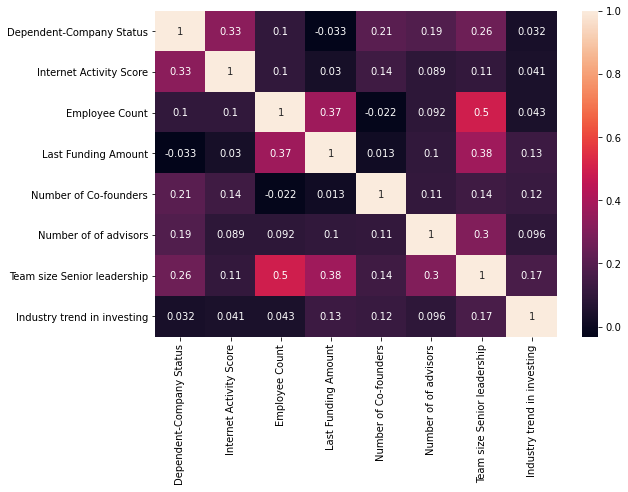

In [8]:
# dropping columns with correlation < 0.1

plt.figure(figsize=(9, 6))
sns.heatmap(df.corr(),annot=True)

In [9]:
df=df.drop(['Industry trend in investing','Last Funding Amount'], axis=1)

In [10]:
# Encoding all categorical features
from sklearn.preprocessing import OneHotEncoder
from sklearn.impute import SimpleImputer

In [11]:
a=df[['Has the team size grown', 'Industry of company','Focus functions of company','Time to maturity of technology (in years)',
     'Country of company','Continent of company','Presence of a top angel or venture fund in previous round of investment',
     'Number of  Sales Support material','Worked in top companies','Average size of companies worked for in the past',
      'Have been part of startups in the past?','Have been part of successful startups in the past?',
      'Was he or she partner in Big 5 consulting?','Consulting experience?','Product or service company?',
      'Catering to product/service across verticals','Focus on private or public data?','Focus on consumer data?',
      'Focus on structured or unstructured data','Subscription based business','Cloud or platform based serive/product?',
      'Local or global player','Linear or Non-linear business model','Capital intensive business e.g. e-commerce, Engineering products and operations can also cause a business to be capital intensive',
      'Number of  of Partners of company','Crowdsourcing based business','Crowdfunding based business','Machine Learning based business',
      'Predictive Analytics business','Speech analytics business','Prescriptive analytics business','Big Data Business',
      'Cross-Channel Analytics/ marketing channels','Owns data or not? (monetization of data) e.g. Factual',
      'Is the company an aggregator/market place? e.g. Bluekai','Online or offline venture - physical location based business or online venture?',
      'B2C or B2B venture?',"Top forums like 'Tech crunch' or 'Venture beat' talking about the company/model - How much is it being talked about?",
      'Average Years of experience for founder and co founder','Exposure across the globe','Breadth of experience across verticals',
      'Highest education','Specialization of highest education','Relevance of education to venture',
      'Relevance of experience to venture','Degree from a Tier 1 or Tier 2 university?','Experience in selling and building products',
      'Top management similarity','Number of  of Research publications',
      'Team Composition score','Dificulty of Obtaining Work force','Pricing Strategy','Hyper localisation',
      'Time to market service or product','Long term relationship with other founders',
      'Proprietary or patent position (competitive position)','Barriers of entry for the competitors','Company awards',
      'Controversial history of founder or co founder','Legal risk and intellectual property',
      'Technical proficiencies to analyse and interpret unstructured data',
      'Solutions offered','Invested through global incubation competitions?',
      'Disruptiveness of technology','Survival through recession, based on existence of the company through recession times',
      'Gartner hype cycle stage'
]]

In [12]:
# filling the missing values with most frequent value of column
imputer=SimpleImputer(missing_values=np.nan, strategy='most_frequent')
c=imputer.fit_transform(a)

In [13]:
# Dropping encoded column if binary
encoder=OneHotEncoder(drop='if_binary')
categdata=encoder.fit_transform(c).toarray()
names=encoder.get_feature_names(['Has the team size grown', 'Industry of company','Focus functions of company','Time to maturity of technology (in years)',
     'Country of company','Continent of company','Presence of a top angel or venture fund in previous round of investment',
     'Number of  Sales Support material','Worked in top companies','Average size of companies worked for in the past',
      'Have been part of startups in the past?','Have been part of successful startups in the past?',
      'Was he or she partner in Big 5 consulting?','Consulting experience?','Product or service company?',
      'Catering to product/service across verticals','Focus on private or public data?','Focus on consumer data?',
      'Focus on structured or unstructured data','Subscription based business','Cloud or platform based serive/product?',
      'Local or global player','Linear or Non-linear business model','Capital intensive business e.g. e-commerce, Engineering products and operations can also cause a business to be capital intensive',
      'Number of  of Partners of company','Crowdsourcing based business','Crowdfunding based business','Machine Learning based business',
      'Predictive Analytics business','Speech analytics business','Prescriptive analytics business','Big Data Business',
      'Cross-Channel Analytics/ marketing channels','Owns data or not? (monetization of data) e.g. Factual',
      'Is the company an aggregator/market place? e.g. Bluekai','Online or offline venture - physical location based business or online venture?',
      'B2C or B2B venture?',"Top forums like 'Tech crunch' or 'Venture beat' talking about the company/model - How much is it being talked about?",
      'Average Years of experience for founder and co founder','Exposure across the globe','Breadth of experience across verticals',
      'Highest education','Specialization of highest education','Relevance of education to venture',
      'Relevance of experience to venture','Degree from a Tier 1 or Tier 2 university?','Experience in selling and building products',
      'Top management similarity','Number of  of Research publications',
      'Team Composition score','Dificulty of Obtaining Work force','Pricing Strategy','Hyper localisation',
      'Time to market service or product','Long term relationship with other founders',
      'Proprietary or patent position (competitive position)','Barriers of entry for the competitors','Company awards',
      'Controversial history of founder or co founder','Legal risk and intellectual property',
      'Technical proficiencies to analyse and interpret unstructured data',
      'Solutions offered','Invested through global incubation competitions?',
      'Disruptiveness of technology','Survival through recession, based on existence of the company through recession times',
      'Gartner hype cycle stage'
])

In [14]:
len(names)

661

In [15]:
# joining encoded results to dataset

df1=pd.DataFrame(categdata, columns=names)
df1
df=df.drop(['Has the team size grown','Industry of company','Focus functions of company','Time to maturity of technology (in years)',
     'Country of company','Continent of company','Presence of a top angel or venture fund in previous round of investment',
     'Number of  Sales Support material','Worked in top companies','Average size of companies worked for in the past',
      'Have been part of startups in the past?','Have been part of successful startups in the past?',
      'Was he or she partner in Big 5 consulting?','Consulting experience?','Product or service company?',
      'Catering to product/service across verticals','Focus on private or public data?','Focus on consumer data?',
      'Focus on structured or unstructured data','Subscription based business','Cloud or platform based serive/product?',
      'Local or global player','Linear or Non-linear business model','Capital intensive business e.g. e-commerce, Engineering products and operations can also cause a business to be capital intensive',
      'Number of  of Partners of company','Crowdsourcing based business','Crowdfunding based business','Machine Learning based business',
      'Predictive Analytics business','Speech analytics business','Prescriptive analytics business','Big Data Business',
      'Cross-Channel Analytics/ marketing channels','Owns data or not? (monetization of data) e.g. Factual',
      'Is the company an aggregator/market place? e.g. Bluekai','Online or offline venture - physical location based business or online venture?',
      'B2C or B2B venture?',"Top forums like 'Tech crunch' or 'Venture beat' talking about the company/model - How much is it being talked about?",
      'Average Years of experience for founder and co founder','Exposure across the globe','Breadth of experience across verticals',
      'Highest education','Specialization of highest education','Relevance of education to venture',
      'Relevance of experience to venture','Degree from a Tier 1 or Tier 2 university?','Experience in selling and building products',
      'Top management similarity','Number of  of Research publications',
      'Team Composition score','Dificulty of Obtaining Work force','Pricing Strategy','Hyper localisation',
      'Time to market service or product','Long term relationship with other founders',
      'Proprietary or patent position (competitive position)','Barriers of entry for the competitors','Company awards',
      'Controversial history of founder or co founder','Legal risk and intellectual property',
      'Technical proficiencies to analyse and interpret unstructured data',
      'Solutions offered','Invested through global incubation competitions?',
      'Disruptiveness of technology','Survival through recession, based on existence of the company through recession times',
      'Gartner hype cycle stage'
], axis=1)


In [16]:
df = pd.concat([df, df1], axis=1)

In [17]:
df=df.drop(['Short Description of company profile','Investors',
      'Est. Founding Date','Last Funding Date'], axis=1)

In [18]:
df

,Dependent-Company Status,year of founding,Age of company in years,Internet Activity Score,Employee Count,Number of Investors in Seed,Number of Investors in Angel and or VC,Number of Co-founders,Number of of advisors,Team size Senior leadership,...,Disruptiveness of technology_Low,Disruptiveness of technology_Medium,"Survival through recession, based on existence of the company through recession times_No","Survival through recession, based on existence of the company through recession times_Not Applicable","Survival through recession, based on existence of the company through recession times_Yes",Gartner hype cycle stage_Peak,Gartner hype cycle stage_Plateau,Gartner hype cycle stage_Slope,Gartner hype cycle stage_Trigger,Gartner hype cycle stage_Trough
0,1.0,NaN,NaN,-1.0,3.0,2,0,1.0,2.0,2.0,...,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0
1,1.0,2011,3,125.0,NaN,5,0,2.0,0.0,4.0,...,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0
2,1.0,2011,3,455.0,14.0,15,0,3.0,0.0,7.0,...,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0
3,1.0,2009,5,-99.0,45.0,6,0,2.0,0.0,4.0,...,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0
4,1.0,2010,4,496.0,39.0,7,0,1.0,1.0,8.0,...,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
467,0.0,2011,3,-5.0,NaN,0,0,0.0,0.0,1.0,...,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0
468,0.0,NaN,NaN,NaN,NaN,0,4,0.0,0.0,1.0,...,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0
469,0.0,2010,4,0.0,0.0,NaN,NaN,2.0,0.0,1.0,...,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0
470,0.0,2009,5,0.0,NaN,NaN,NaN,3.0,2.0,1.0,...,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0


In [19]:
from sklearn.impute import KNNImputer
# Filling other numerical missing values with nearest neighbour value

In [20]:
imputer = KNNImputer()
imputer.fit(df)
a=imputer.transform(df)

In [21]:
daf=pd.DataFrame(a, columns=df.columns)

In [22]:
daf.isnull().values.any()

False

In [23]:
daf.dtypes

Dependent-Company Status            float64
year of founding                    float64
Age of company in years             float64
Internet Activity Score             float64
Employee Count                      float64
                                     ...   
Gartner hype cycle stage_Peak       float64
Gartner hype cycle stage_Plateau    float64
Gartner hype cycle stage_Slope      float64
Gartner hype cycle stage_Trigger    float64
Gartner hype cycle stage_Trough     float64
Length: 701, dtype: object

In [24]:
s = daf.select_dtypes(include='O').columns
daf[s] = daf[s].astype("float64")

In [49]:
# Chechikng correlation of data. If correlation number is close to 1 it means that our target 
# variable Company Status is dependent on that feature
corr=daf.corr()
corr

,Dependent-Company Status,year of founding,Age of company in years,Internet Activity Score,Employee Count,Number of Investors in Seed,Number of Investors in Angel and or VC,Number of Co-founders,Number of of advisors,Team size Senior leadership,...,Disruptiveness of technology_Low,Disruptiveness of technology_Medium,"Survival through recession, based on existence of the company through recession times_No","Survival through recession, based on existence of the company through recession times_Not Applicable","Survival through recession, based on existence of the company through recession times_Yes",Gartner hype cycle stage_Peak,Gartner hype cycle stage_Plateau,Gartner hype cycle stage_Slope,Gartner hype cycle stage_Trigger,Gartner hype cycle stage_Trough
Dependent-Company Status,1.000000,0.274150,-0.274150,0.344374,0.166462,0.173772,0.070554,0.205835,0.188963,0.255690,...,0.065776,-0.251949,-0.358305,0.037118,0.200419,0.182801,-0.374300,0.050252,0.148614,0.186882
year of founding,0.274150,1.000000,-1.000000,0.201830,-0.286333,0.206336,-0.072236,0.234622,-0.037920,-0.254038,...,0.055806,-0.083750,-0.309023,0.669132,-0.554404,0.185054,-0.121009,0.076766,-0.240644,0.197069
Age of company in years,-0.274150,-1.000000,1.000000,-0.201830,0.286333,-0.206336,0.072236,-0.234622,0.037920,0.254038,...,-0.055806,0.083750,0.309023,-0.669132,0.554404,-0.185054,0.121009,-0.076766,0.240644,-0.197069
Internet Activity Score,0.344374,0.201830,-0.201830,1.000000,0.169237,0.170023,-0.013498,0.146877,0.104925,0.119058,...,0.012259,-0.157507,-0.139674,0.097819,-0.017015,0.154183,-0.191369,-0.009876,-0.024006,0.163254
Employee Count,0.166462,-0.286333,0.286333,0.169237,1.000000,-0.057149,0.004195,0.022577,0.102204,0.425044,...,-0.045399,-0.063383,-0.098748,-0.234120,0.334155,0.011644,-0.010301,-0.036070,0.045607,-0.023927
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Gartner hype cycle stage_Peak,0.182801,0.185054,-0.185054,0.154183,0.011644,0.044136,-0.062948,0.146149,0.121640,0.006200,...,0.011942,-0.095202,-0.070766,0.031499,0.011996,1.000000,-0.482719,-0.102191,-0.179579,-0.146825
Gartner hype cycle stage_Plateau,-0.374300,-0.121009,0.121009,-0.191369,-0.010301,-0.069733,0.044490,-0.209461,-0.127578,-0.150358,...,0.057352,0.072637,0.139461,0.058272,-0.161016,-0.482719,1.000000,-0.253054,-0.444690,-0.363582
Gartner hype cycle stage_Slope,0.050252,0.076766,-0.076766,-0.009876,-0.036070,-0.026363,-0.038281,0.018173,-0.021116,0.036282,...,-0.041916,0.023801,-0.061366,0.124560,-0.100601,-0.102191,-0.253054,1.000000,-0.094141,-0.076970
Gartner hype cycle stage_Trigger,0.148614,-0.240644,0.240644,-0.024006,0.045607,-0.060071,0.045491,0.073345,0.035787,0.178766,...,-0.079383,0.018806,-0.009813,-0.348458,0.404407,-0.179579,-0.444690,-0.094141,1.000000,-0.135258


In [68]:
# Filtering top 30 features that affect Company Status
a=corr.nlargest(30, 'Dependent-Company Status')
a['Dependent-Company Status']

Dependent-Company Status                                                                    1.000000
Specialization of highest education_business                                                0.600408
Dificulty of Obtaining Work force_Low                                                       0.451536
Focus on structured or unstructured data_no                                                 0.451452
Technical proficiencies to analyse and interpret unstructured data_Yes                      0.443313
Experience in selling and building products_Medium                                          0.443078
Team Composition score_Low                                                                  0.428013
Top management similarity_None                                                              0.426678
Big Data Business_Yes                                                                       0.412883
Dificulty of Obtaining Work force_Medium                                                   